In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from statsmodels.tsa.arima_process import arma_generate_sample
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
import io
import pandas as pd
myfile = files.upload()
data = pd.read_excel(io.BytesIO(myfile['mydata.xlsx']))

Saving mydata.xlsx to mydata (2).xlsx


In [ ]:
data

,Month,Electricity Usage,Average Maximum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth
0,2002-01-01,24352.83118,6.0,64.0,64,0,1314.4,55330,538.4580,1227.50,784741.3,20.3,7.7
1,2002-02-01,21099.63500,8.8,6.7,56,0,1323.8,525460,538.4580,1225.43,784741.3,20.4,7.7
2,2002-03-01,23568.18835,14.3,53.1,56,0,1325.9,29620,538.4580,1233.62,784741.3,20.5,7.7
3,2002-04-01,22199.24014,19.6,153.7,58,0,1294.0,452940,538.4580,1265.08,784741.3,20.4,7.7
4,2002-05-01,22960.52245,22.5,113.6,67,0,1226.3,74240,538.4580,1293.46,784741.3,20.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,52889.45221,3.8,15.2,62,0,1264.5,85550,682.3210,1563.68,2150575.8,20.5,2.6
252,2023-01-01,51651.56160,12.5,47.9,63,0,1231.9,1020000,739.8397,1562.93,2206263.0,20.6,1.6
253,2023-02-01,45739.50828,12.4,1.0,59,0,1322.6,111600,739.8397,1578.49,2206263.0,20.8,1.6
254,2023-03-01,44077.47262,25.1,10.5,51,0,1301.9,5220000,739.8397,1592.25,2206263.0,20.9,1.6


In [ ]:
feature_list = list(data.columns[2:])
features=data.iloc[:, 2:]
# feautre_list: 특성 이름들
# features : target 제외한 데이터셋 

In [ ]:
target = data.iloc[:, 1]

In [ ]:
time = data.iloc[:, 0]

In [ ]:
# 시계열 차분
diff_features = features.diff().dropna()  # 독립 변수 차분
diff_target = target.diff().dropna()  # target 변수 차분

In [ ]:
diff_features2 = diff_features.diff().dropna()
diff_target2 = diff_target.diff().dropna()

In [ ]:
# 차분된 데이터를 합치기
diff_data = pd.concat([time, diff_features, diff_target], axis=1)

new_data = pd.DataFrame(diff_data)

new_data


,Month,Average Maximum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,Electricity Usage
0,2002-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-02-01,2.8,-57.3,-8.0,0.0,9.4,470130.0,0.0000,-2.07,0.0,0.1,0.0,-3253.19618
2,2002-03-01,5.5,46.4,0.0,0.0,2.1,-495840.0,0.0000,8.19,0.0,0.1,0.0,2468.55335
3,2002-04-01,5.3,100.6,2.0,0.0,-31.9,423320.0,0.0000,31.46,0.0,-0.1,0.0,-1368.94821
4,2002-05-01,2.9,-40.1,9.0,0.0,-67.7,-378700.0,0.0000,28.38,0.0,0.0,0.0,761.28231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,-12.7,-46.4,-6.0,0.0,-54.3,-898250.0,0.0000,-86.64,0.0,0.0,0.0,8550.79661
252,2023-01-01,8.7,32.7,1.0,0.0,-32.6,934450.0,57.5187,-0.75,55687.2,0.1,-1.0,-1237.89061
253,2023-02-01,-0.1,-46.9,-4.0,0.0,90.7,-908400.0,0.0000,15.56,0.0,0.2,0.0,-5912.05332
254,2023-03-01,12.7,9.5,-8.0,0.0,-20.7,5108400.0,0.0000,13.76,0.0,0.1,0.0,-1662.03566


In [ ]:
new_data = new_data.drop([0, 1], axis=0)
new_data
#결측치 첫 번째 행 제거 

,Month,Average Maximum Temperature,Average Rainfall,Average Humidity,Tropical Night,Exchage Rate,Gold Trading Volume(g),Total Greenhouse Gase Emissions in Korea,The Price of Gasoline,Gross Domestic Product (KRW 1 billion),Global Average Sea-level Temperature(℃),A Rate of Economic Growth,Electricity Usage
2,2002-03-01,5.5,46.4,0.0,0.0,2.1,-495840.0,0.0000,8.19,0.0,0.1,0.0,2468.55335
3,2002-04-01,5.3,100.6,2.0,0.0,-31.9,423320.0,0.0000,31.46,0.0,-0.1,0.0,-1368.94821
4,2002-05-01,2.9,-40.1,9.0,0.0,-67.7,-378700.0,0.0000,28.38,0.0,0.0,0.0,761.28231
5,2002-06-01,4.5,-42.1,-1.0,0.0,-25.0,495260.0,0.0000,-4.04,0.0,-0.1,0.0,-485.08734
6,2002-07-01,1.6,169.2,10.0,3.0,-13.3,-563740.0,0.0000,-10.70,0.0,0.0,0.0,1932.90382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2022-12-01,-12.7,-46.4,-6.0,0.0,-54.3,-898250.0,0.0000,-86.64,0.0,0.0,0.0,8550.79661
252,2023-01-01,8.7,32.7,1.0,0.0,-32.6,934450.0,57.5187,-0.75,55687.2,0.1,-1.0,-1237.89061
253,2023-02-01,-0.1,-46.9,-4.0,0.0,90.7,-908400.0,0.0000,15.56,0.0,0.2,0.0,-5912.05332
254,2023-03-01,12.7,9.5,-8.0,0.0,-20.7,5108400.0,0.0000,13.76,0.0,0.1,0.0,-1662.03566


In [ ]:
new_data = new_data.drop(['Month'], axis=1)

In [ ]:
# Scale your data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(new_data)

In [ ]:
dataframe = pd.DataFrame(data)

In [ ]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.716535,0.564391,0.40625,0.564103,0.546065,0.430228,0.436505,0.532850,0.000000,0.666667,0.433962,0.655698
1,0.708661,0.617795,0.46875,0.564103,0.458323,0.490184,0.436505,0.583256,0.000000,0.333333,0.433962,0.438465
2,0.614173,0.479161,0.68750,0.564103,0.365935,0.437869,0.436505,0.576584,0.000000,0.500000,0.433962,0.559053
3,0.677165,0.477190,0.37500,0.564103,0.476129,0.494877,0.436505,0.506358,0.000000,0.333333,0.433962,0.488498
4,0.562992,0.685388,0.71875,0.641026,0.506323,0.425799,0.436505,0.491931,0.000000,0.500000,0.433962,0.625376
...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.000000,0.472953,0.21875,0.564103,0.400516,0.403979,0.436505,0.327434,0.000000,0.500000,0.433962,1.000000
250,0.842520,0.550892,0.43750,0.564103,0.456516,0.523525,0.994554,0.513484,0.425315,0.666667,0.339623,0.445884
251,0.496063,0.472460,0.28125,0.564103,0.774710,0.403317,0.436505,0.548814,0.000000,0.833333,0.433962,0.181290
252,1.000000,0.528032,0.15625,0.564103,0.487226,0.795789,0.436505,0.544915,0.000000,0.666667,0.433962,0.421874


In [ ]:
features2 = dataframe.iloc[:, 0:11]
target2 = dataframe.iloc[:, 11]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features2, target2, test_size=0.2, shuffle=False) 

In [ ]:
# 랜덤 포레스트 모델 구축
rf_model = RandomForestRegressor(n_estimators=100)  # 원하는 모델 파라미터로 설정
rf_model.fit(X_train, y_train)  # 모델 훈련

RandomForestRegressor()

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

RMSE: 0.16416575415085363


In [ ]:
from sklearn.metrics import r2_score

# 결정 계수를 계산합니다.
r2 = r2_score(y_test, y_pred)

# 결정 계수를 출력합니다.
print("R^2 Score:", r2)

R^2 Score: 0.49410753534651075


In [ ]:
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree


In [ ]:
# 특성 중요도 계산
importances = rf_model.feature_importances_

In [ ]:
importances

array([0.27020341, 0.07906398, 0.08400826, 0.30093744, 0.04482374,
       0.09630656, 0.00211837, 0.05666344, 0.00240634, 0.06244559,
       0.00102287])

In [ ]:
# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(importances)[::-1]

In [ ]:
indices

array([ 3,  0,  5,  2,  1,  9,  7,  4,  8,  6, 10])

In [ ]:
features2.columns

RangeIndex(start=0, stop=11, step=1)

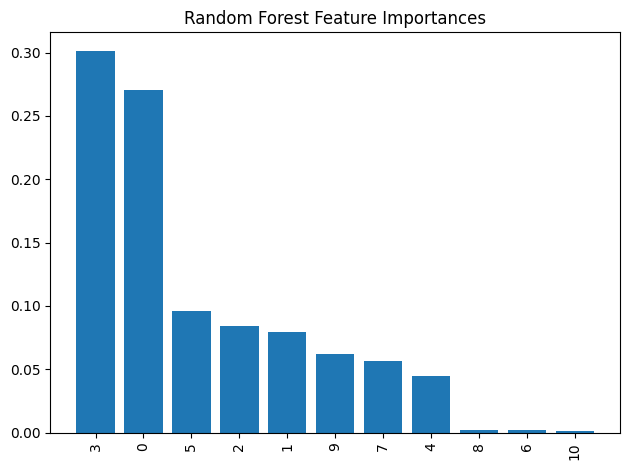

In [ ]:
# 특성 중요도 시각화
plt.figure()
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features2.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
